RETAIL STORE SALES 

PHASE 1

PROJECT OVERVIEW

Domain:Retail Store sales 

🎯Objective:Improve sales performance, understand customer behavior, and optimize product mix.

💼Business Problem:Identify the top-performing product categories based on total revenue.
Determine high-value customers contributing maximum overall sales.
Analyze sales volume to classify items as fast-moving or slow-moving.
Assess how discounts influence customer purchasing behavior and revenue.
Compare payment methods to understand customer payment preferences.
Evaluate monthly and yearly sales patterns to support demand forecasting.

Dataset:Containing 12575 rows and 11 columns including Transaction ID to discount applied.


1.Data loading and initial overview.
FOCUS:
Import the dataset using Pandas and provide an overview: 
-Number of rows and columns 
-Data types of each columns
-Initial observations (e.g., head(), info(), describe()) 

Importing Pandas library for analysis.Pandas provides essential data structures such as DataFrames and Series, which make it easy to load, clean, explore, and analyze datasets efficiently.

In [13]:
import pandas as pd
import numpy as np

1.2.Loaded the dataset using pandas library.
This allows  to access and analyze the retail sales data directly within Python.

In [14]:
df=pd.read_csv(r'C:\Users\dell\Downloads\retail_store_sales.csv')

1.3.Checked the number of rows and columns.
Which is the very important and crcucial steps to consider berfore data preprocessing.

In [58]:
df.shape

(12575, 11)

Total number of rows:12575
Total number of columns:11

1.4.Examined the datatypes of each column.
--Knowing the data types of each column is important because it ensures accurate analysis and processing. 
--Correct dtypes help in performing mathematical operations, handling dates properly, optimizing memory usage, detecting errors, and applying the right cleaning methods. It forms the foundation for reliable data analysis.

In [59]:
df.dtypes

Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object

1.5.Retreived some of the sample records to display the overview of the dataset.
This helps to quickly understand the structure of data.

In [60]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,08-04-2024,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,23-07-2023,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,05-10-2022,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,07-05-2022,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,02-10-2022,False


1.6.For the more detailed information of not null counts and dtypes.
--This is the most important steps to be done before starting the analysis by doing df.info() function gives the overall structure of the dataset including columns,non-null counts and dtype.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


1.7.Statistical view of the dataset.
This step helps for initial Exploratory analysis where it shows up the distribution as well as spread of the data.It overall summarize the dataset.


In [62]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


PHASE 2

2.Data Pre-Processing
FOCUS:
Perform all necessary cleaning steps such as: 
--Handling missing values 
--Removing duplicates 
--Correcting data types 
--Creating derived columns 
--Filtering or aggregating data 


🧩2.1.Handling missing values 
--This ensures that the dataset has no null values in numeric fields for accuarate calculations.

In [63]:
df.fillna(df.mean(numeric_only=True),inplace=True)

--Filled categorical columns to avoid inconsistencies.
--Filling categorical columns avoid creating bias by irrelavant values.

In [31]:
df['Item']=df['Item'].fillna('Unknown')
df['Discount Applied']=df['Discount Applied'].fillna('Unknown')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

df['Transaction Date'] = df['Transaction Date'].fillna(pd.Timestamp("2024-01-01"))

df['Transaction ID'] = df['Transaction ID'].fillna(0)
df['Transaction ID'] = df['Transaction ID'].astype(str)
df['Transaction ID'] = df['Transaction ID'].replace("nan", np.nan)

df['Customer ID'] = df['Customer ID'].fillna(0)




--Verified the missing values with the below function where we get the sum of number of nulls each column consist.

In [32]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
Discount Amount     0
After Discount      0
Revenue Category    0
Year                0
Month               0
dtype: int64

🔁2.2.Removed duplicate records.
This Function plays a crucial role in data cleaning by identifying and removing repeated rows from the dataset. Duplicate records can occur due to data entry errors, system glitches, or repeated transactions during data collection.By doing this the dataset will be:
---Reliable
---Consistent
---Accurate 

In [11]:
df.drop_duplicates()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,08-04-2024,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,23-07-2023,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,05-10-2022,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,07-05-2022,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,02-10-2022,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,03-09-2023,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,12-08-2022,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,24-08-2024,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,30-12-2023,True


--Verified the duplicates removed.

In [12]:
df.duplicated().sum()

np.int64(0)

⚠️2.3.Converting wrong datatypes of columns to the right one.
The data type conversions aims to:
---Avoids Errors in Analysis
---Improves Data Quality & Consistency
---Accurate Calculations

In [18]:

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
median_date = df['Transaction Date'].median()
df['Transaction Date'] = df['Transaction Date'].fillna(median_date)


df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

df['Transaction ID'] = pd.to_numeric(df['Transaction ID'], errors='coerce').astype('Int64')
df['Customer ID'] = df['Customer ID'].astype(str).str.strip()
df['Category'] = df['Category'].astype('category')
df['Item'] = df['Item'].astype('category')
df['Payment Method'] = df['Payment Method'].astype('category')
df['Location'] = df['Location'].astype('category')


df['Discount Applied'] = df['Discount Applied'].astype(bool)



--Verified the dtypes of the datatypes after performing the dtype conversion.

In [23]:
df.dtypes

Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied       bool
Discount Amount     float64
After Discount      float64
Revenue Category     object
Year                  int64
Month                object
dtype: object

🪄2.4.Derived columns to the dataset for insights and make analysis easier.
Benefits:
---Focus on Relevant Data Only
---Improves Accuracy of Insights
---Helps in Identifying Patterns

Craeted new features:
1.Year, Month,Day of Transaction Date
2.Total Value
3.Discount Amount
4.After Discount
5.Revenue Category

In [21]:

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Month'] = df['Transaction Date'].dt.month_name()


df['Discount Applied'] = df['Discount Applied'].fillna(False)
df['Discount Amount'] = df.apply(lambda x: x['Price Per Unit'] * x['Quantity'] * 0.10 if x['Discount Applied'] == True   else 0, axis=1)

df['After Discount']=df['Total Spent']-df['Discount Amount']
df['Revenue Category'] = pd.cut(df['Total Spent'],bins=[0, 200, 400, float('inf')], labels=['Low', 'Medium', 'High'],  include_lowest=True)



--Verified all the derived columns.

In [25]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied', 'Discount Amount',
       'After Discount', 'Revenue Category', 'Year', 'Month'],
      dtype='object')

🔍2.5.Filtered/Picked certain rows using column condition.
This reduces noise in the dataset, making trends and patterns easier to identify.Filtering also improves the accuracy of insights because the analysis is based on clean, targeted information rather than cluttered data.

--Simplifies the Dataset
--Enhances Analysis Quality
--Makes Reporting Easier

Filtered rows:
1.Category: Patisserie
2.Discount Applied: True
3.Location: Online
4.Total Spent: >200

In [27]:
df['Total Spent'] = df['Total Spent'].apply(lambda x: 0 if x < 0 else x)


filtered_df = df[
    (df['Category'] == 'Patisserie') &
    (df['Discount Applied'] == True) &
    (df['Location'] == 'Online') &
    (df['Total Spent'] > 200)
]
filtered_df.head()



,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Discount Amount,After Discount,Revenue Category,Year,Month
16,NaN,CUST_23,Patisserie,Item_17_PAT,29.0,8.0,232.0,Cash,Online,2024-01-01,True,23.2,208.8,Medium,2024,January
348,NaN,CUST_25,Patisserie,Item_20_PAT,33.5,8.0,268.0,Cash,Online,2022-11-02,True,26.8,241.2,Medium,2022,November
452,NaN,CUST_01,Patisserie,Item_17_PAT,29.0,10.0,290.0,Digital Wallet,Online,2024-09-10,True,29.0,261.0,Medium,2024,September
822,NaN,CUST_08,Patisserie,Item_25_PAT,41.0,6.0,246.0,Credit Card,Online,2024-01-01,True,24.6,221.4,Medium,2024,January
1287,NaN,CUST_25,Patisserie,Item_23_PAT,38.0,6.0,228.0,Cash,Online,2024-01-01,True,22.8,205.2,Medium,2024,January


⚖️2.6.Aggregated data using columns for summarization.
Aggregation refers to the process of summarizing or combining multiple rows of data into a single meaningful value. It is commonly done using functions like sum, average, count, max, min.

--Aggreagated data:
1.Total revenue by category.
2.Average price per item.
3.Number of transaction per customer
4.Average quantity by location

In [157]:
results={
'Total revenue by category':df.groupby('Category', observed=False)['Total Spent'].sum().reset_index(),
'Average price per item':df.groupby('Item', observed=False)['Price Per Unit'].mean().reset_index(),
'Number of transaction per customer':df.groupby('Customer ID', observed=False).size().reset_index(name='Transaction Count'),
'Average quantity by location':df.groupby('Location', observed=False)['Quantity'].mean().reset_index()
}    
for name, result in results.items():
    print(f"\n==== {name.upper()} ====")
    print(result)




==== TOTAL REVENUE BY CATEGORY ====
                             Category    Total Spent
0                           Beverages  206252.832974
1                            Butchers  217452.985551
2  Computers and electric accessories  201194.358745
3       Electric household essentials  213537.443282
4                                Food  205313.858745
5                           Furniture  203867.070089
6                       Milk Products  189317.332974
7                          Patisserie  193445.274208

==== AVERAGE PRICE PER ITEM ====
             Item  Price Per Unit
0     Item_10_BEV       18.500000
1     Item_10_BUT       18.500000
2     Item_10_CEA       18.500000
3     Item_10_EHE       18.500000
4    Item_10_FOOD       18.500000
..            ...             ...
196   Item_9_FOOD       17.000000
197    Item_9_FUR       17.000000
198   Item_9_MILK       17.000000
199    Item_9_PAT       17.000000
200       Unknown       23.450816

[201 rows x 2 columns]

==== NUMBER OF TRAN

After Pre-processing the most important step is to download the cleaned dataset for:
---Faster future analysis
---Data Integrity
---Improves performance


In [47]:
df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")

Cleaned dataset saved as 'cleaned_dataset.csv'


Downloaded the cleaned dataset for better analysis.
imported the cleaned dataset for accurate visualization and also imported required libraries.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r'C:\Users\dell\Downloads\cleaned dataset.csv')

In [49]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Discount Amount,After Discount,Revenue Category,Year,Month
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,08-04-2024,True,18.5,166.5,Low,2024,April
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,01-01-2024,True,26.1,234.9,Medium,2024,January
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,05-10-2022,False,0.0,43.0,Low,2022,October
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,07-05-2022,False,0.0,247.5,Medium,2022,May
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,02-10-2022,False,0.0,87.5,Low,2022,October


PHASE 3

3.Exploratory Data Analysis (EDA):
--Helps understand the dataset
--Reveals patterns and trends
--Reduce risk of wrong conclusion

📊3.1.Univariate analysis:
Focuses on examining single variable at a time.This aims to understand or detect patterns without considering relationship with other variables.

--Helps understand data distribution (normal, skewed, uniform, etc.).
--Detects outliers and unusual patterns early in the analysis.
--Identifies missing values and inconsistencies in individual columns.


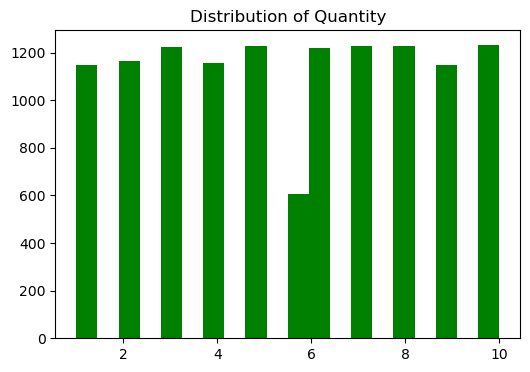

In [28]:
plt.figure(figsize=(6,4))
plt.hist(df['Quantity'], bins=20,color='green')
plt.title("Distribution of Quantity")
plt.show()

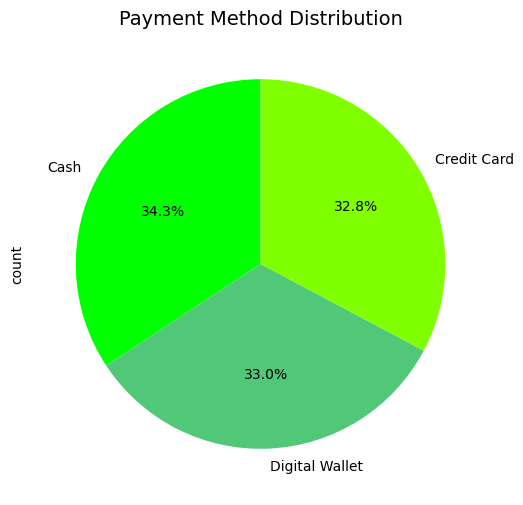

In [34]:
plt.figure(figsize=(6,6))
df['Payment Method'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, 
    colors=['#00FF00','#50C878','#7FFF00','#00FF7F']
)
plt.title("Payment Method Distribution", fontsize=14)
plt.show()


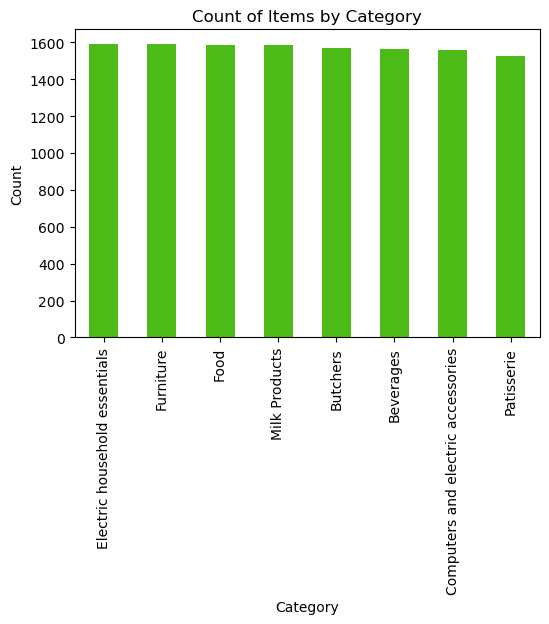

In [39]:
df['Category'].value_counts().plot(kind='bar', figsize=(6,4),color='#4CBB17')
plt.title("Count of Items by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


🔗3.2.Bivariate Analysis:Focuses on studying the relationship between two variables at the same time. It helps identify how one variable changes with respect to another and reveals patterns that cannot be seen in univariate analysis.

--Identifies relationships between two variables.
--Helps detect trends, patterns, and associations that guide business decisions.
--Highlights anomalies or unexpected relationships that may require deeper analysis.

🔢1.Quantity and Total Spent: Reveals how purchase size (quantity) relates to spending using scatter plot.
From the graph: 
--It is clearly visible that higher Quantity purchased results in higher spending.
--Total spent is directly dependent on Quantity.

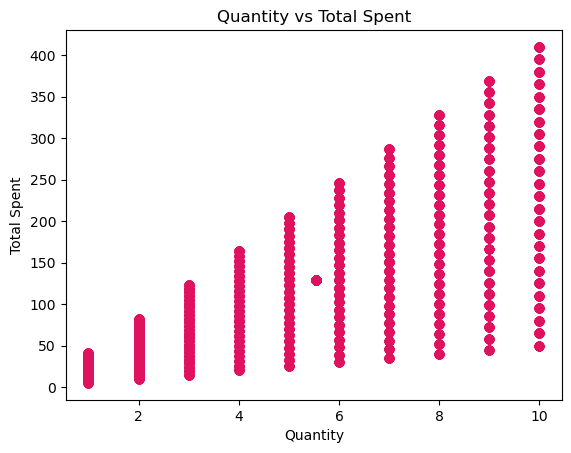

In [21]:
plt.scatter(df['Quantity'], df['Total Spent'],color='#E0115F')
plt.xlabel("Quantity")
plt.ylabel("Total Spent")
plt.title("Quantity vs Total Spent")
plt.show()

📦2.Category and Discount Amount: This compares how much discount is distributed across each category.
--The line inside each box represents the median discount for that category.
--Higher points = larger discount.
--Lower points = smaller discount.

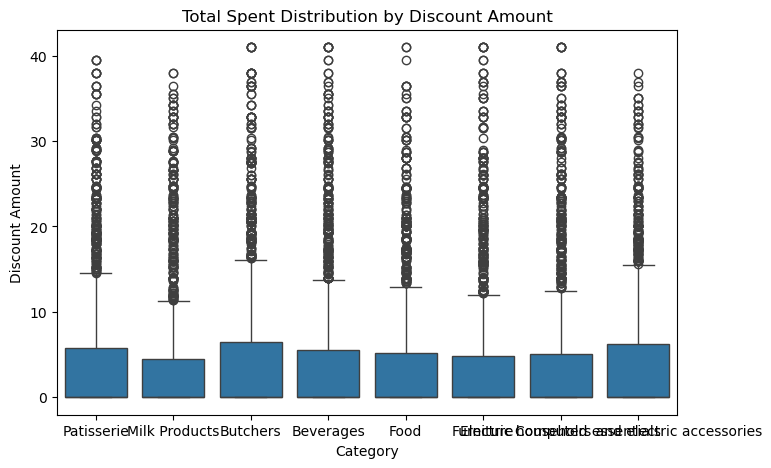

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Category', y='Discount Amount', data=df)
plt.title("Total Spent Distribution by Discount Amount")
plt.xlabel("Category")
plt.ylabel("Discount Amount")
plt.show()

🌐3.3. Multivariate Analysis:Analyzes three or more variables together.Useful for understanding complex patterns in the dataset.

💳3.Average spending by Payment Method:Groups the dataframe by Payment Method.
--Compares how much customers spend on average using each payment method.
--It helps to find the most profitable payment channel.


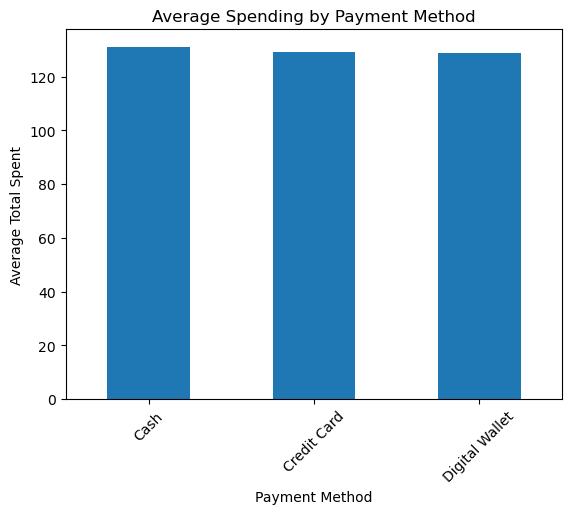

In [58]:
df.groupby('Payment Method')['Total Spent'].mean().plot(kind='bar')
plt.title("Average Spending by Payment Method")
plt.ylabel("Average Total Spent")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.show()

🔗4.Correlation Heatmap of Numerical Features:The correlation heatmap shows how strongly the numerical features in the dataset are related to each other.
--Quickly identifies strong relationships
--Helps in feature selection

In [33]:
df.corr(numeric_only=True)

,Price Per Unit,Quantity,Total Spent,Discount Applied,Discount Amount,After Discount,Year
Price Per Unit,1.000000,0.011185,0.597953,0.008196,0.250362,0.593670,-0.006038
Quantity,0.011185,1.000000,0.712069,-0.000707,0.272456,0.709314,0.003206
Total Spent,0.597953,0.712069,1.000000,0.006139,0.379431,0.996423,-0.001798
Discount Applied,0.008196,-0.000707,0.006139,1.000000,0.753744,-0.062515,-0.005162
Discount Amount,0.250362,0.272456,0.379431,0.753744,1.000000,0.299886,-0.005698
After Discount,0.593670,0.709314,0.996423,-0.062515,0.299886,1.000000,-0.001333
Year,-0.006038,0.003206,-0.001798,-0.005162,-0.005698,-0.001333,1.000000


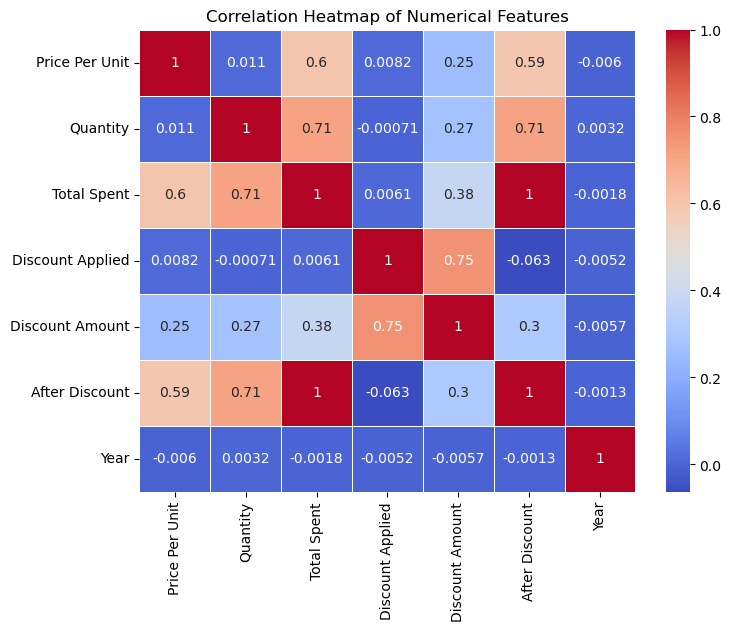

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



🗂️5.Pivot tables:pivot table summarizes the total revenue (Total Spent) for each Category across each Month.
--Gives the overview which have the highest sales for each category.
--Which products peak in specific seasons.

In [15]:
sales_overview = pd.pivot_table(
    df,
    values='Total Spent',
    index='Category',
    columns='Month',
    aggfunc='sum'
)
sales_overview

Month,April,August,December,February,January,July,June,March,May,November,October,September
Category,,,,,,,,,,,,
Beverages,5642.110308,6072.957731,6864.500000,7140.305154,130825.365969,7725.457731,7383.652577,4408.457731,6930.805154,5329.610308,9396.152577,8533.457731
Butchers,8318.805154,5998.305154,7659.762886,6163.500000,145739.128855,6558.152577,6110.610308,4335.652577,6698.457731,5801.652577,7764.305154,6304.652577
Computers and electric accessories,7002.000000,6304.262886,7548.457731,5528.415463,130705.128855,5995.152577,7991.457731,7721.652577,4039.805154,6071.457731,5342.610308,6943.957731
Electric household essentials,6289.457731,5186.152577,5800.305154,7185.110308,138862.908238,6789.915463,8443.068040,7186.957731,7664.110308,8544.500000,4619.152577,6965.805154
Food,5781.957731,6372.305154,6686.262886,5042.152577,132567.586586,7900.457731,6249.957731,6635.152577,5257.152577,7658.957731,7402.415463,7759.500000
Furniture,7701.610308,8688.652577,6429.152577,7650.000000,128987.171124,6893.957731,6241.152577,7813.805154,5790.652577,5261.805154,6566.457731,5842.652577
Milk Products,4648.500000,4984.957731,8319.415463,5635.000000,124230.781432,6578.305154,5546.305154,5845.305154,3608.152577,7454.610308,5185.000000,7281.000000
Patisserie,7569.762886,5065.457731,5183.568040,6807.305154,126323.739163,4988.500000,7627.610308,6390.610308,5207.305154,6140.610308,6039.000000,6101.805154


📅6.Monthly Revenue Trend by Payment Method:helps summarize how much each payment type contributed in every month.
--clearly highlights monthly revenue patterns and allows easy comparison across different payment modes.
--Helps identify seasonality in sales, reveals which payment methods are growing or declining, and assists in understanding customer payment preferences over time.

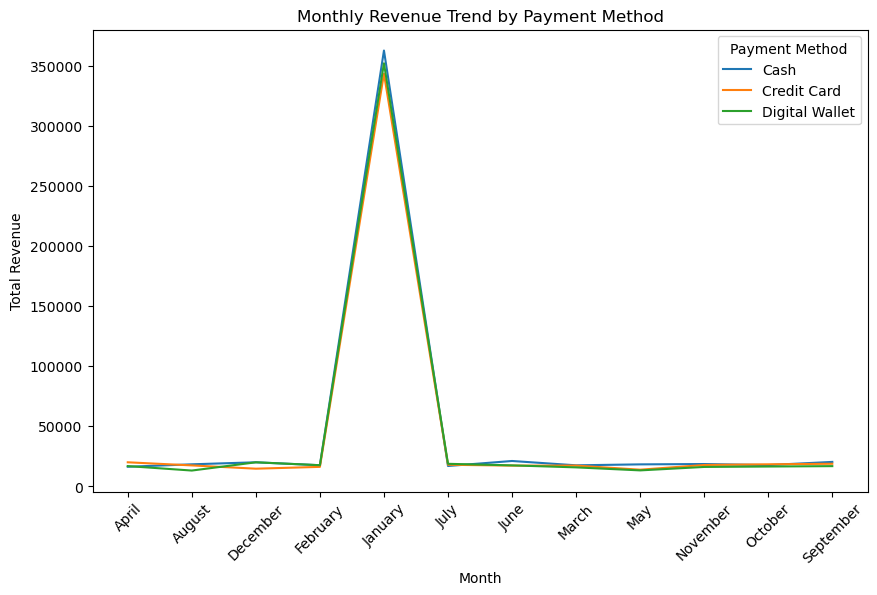

In [42]:
monthly_payment = df.groupby(['Month', 'Payment Method'])['Total Spent'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_payment, x='Month', y='Total Spent', hue='Payment Method')
plt.title("Monthly Revenue Trend by Payment Method")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


🗓️7.Average Spending by Location and Category:bar chart compares the average spending between Online and In-Store customers.
--Clearly compare whether customers spend more online or in-store and also identify which categories perform better on each platform.
--Visualization gives a strong multivariate view of spending behavior across sales channels and categories.

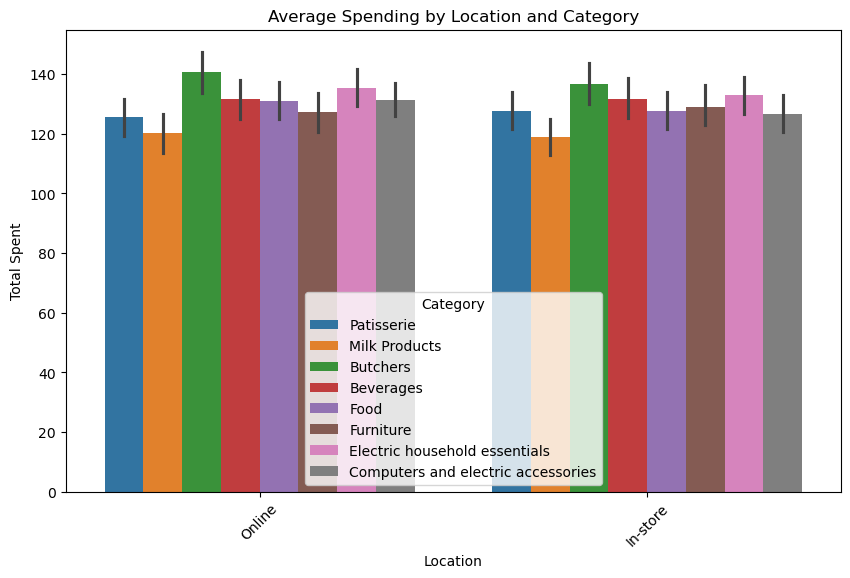

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,
            x='Location',
            y='Total Spent',
            hue='Category',
            estimator='mean')

plt.title("Average Spending by Location and Category")
plt.xticks(rotation=45)
plt.show()


💰8.Yearly Revenue by Payment Method:This structure allows  to quickly compare how each category performs Year-by-year and identify patterns in sales.
--Clear mYear-wise comparison of revenue categories.
--Highlights Yearly changes in category performance.

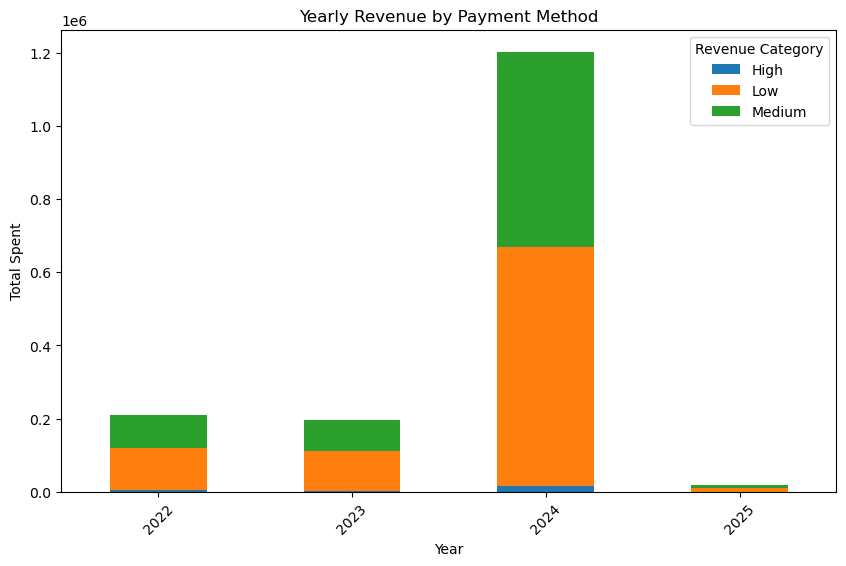

In [12]:
pivot = df.pivot_table(values='Total Spent',
                       index='Year',
                       columns='Revenue Category',
                       aggfunc='sum')

pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Yearly Revenue by Payment Method")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()

PHASE 4

🔑#Key Patterns

--January has the highest number of transactions,showing strong seasonality.
--All payment method follow the same pattern,indicating uniform customer behaviour.
--'Butchers' category has the highest average spending across both Online and In-store.
--Most categories show higher spending in physical way(In-store) than Online
--Electric household essentials and computer accessories show moderate spending.
--January has the highest sales than any other month.May be this is due to festive promotions or offers.
--High value categories like Butcher,Electrics and Beverages show larger discount amounts.
--As Quantity Increases, Total Spent increases
--Customer uses all three payment methods equally.
--Customer purchases Quantities between 1 and 20 where it is fairly balanced.

🔗#Correlations

--Quantity<->Total spent: Strong positive correlation that is higher correlation directly increases total spending.

--Price Per Unit<->Total Spent:Higher priced items contribute to more spending.

--Discount Applied<->Discount Amount: If Discount applied then discount ampunt increases proportionally.

--Discount Amount<->Total Spent:Customers who spend more tend to recieve higher discount amounts.

--Year has near zero correlation with all variables.
--Discount Applied<->Total Spent:Applying a discount doesnot affect how much customers spend,have zero correlation.

🛑#Anomalies

--No negative values were found in any numeric column.
--A few rows show unusually high purchase quantities compared to the typical purchase range.
Reason: These may indicate bulk orders, data entry errors, or special B2B transactions.

📝#Overall Summary 

This dataset contains retail data including customer details,pricing,discounts,purchase quantities and payment modes with time based information.Key numerical varibales such as Price Per Unit,Quantity,Total Spent, Discount Amount,After Discount which shows strong sales performance.Meanwhile categorical variables like Category,Revenue Category, Payment Method where helps to compare across various business dimensions.Pre-Processing steps cleared all the inconsistencies in the dataset which helps in a accurate analysis of the dataset.Throug Exploratory Data Analysis explored various relationship between the respective varibles are showcased that gives a clear cut view of insights.
